# Yahoo Tick Data
Here we download tick data from Yahoo Finance. Data is typically delayed by 15 mins.
To download data we must specify the data range or 'period' and the data frequency or 'interval'.

In [1]:
# Import Modules
import os
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs

# Magic function to enable matplotlib charting in jupyter notebooks
%matplotlib inline

# Allow Cell Multi Printing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Disable Warnings
import warnings
warnings.filterwarnings('ignore')

# Financial Data Class
This class is responsible for downloading data. It also computes and adds a "Returns" column.

In [2]:
# This class will download data from yahoo finance
class FinancialData:
    
    # Class constructor to store parameters, download and format data
    # Note that period will show the current price (delayed by around 15 mins)
    def __init__(self, ticker, period, interval, price_column):
        
        # Member Data
        self.ticker = ticker
        self.price_column = price_column
        
        # The period can be "1d", "5d", "1mo", "3mo", "6mo", "1y", "2y", "5y", "10y", or "ytd
        self.period = period 
        
        # The interval can be "1m", "2m", "5m", "10m", "30m", "1h", "1d", "1wk", "1mo" etc.
        self.interval = interval
        
        # Download and Format Data
        self.download_data()
        self.prepare_data()

    # Download data from yahoo finance
    def download_data(self):
        print(f"Downloading Data from Yahoo Finance for {self.ticker}")
        print(f"(15m Delayed Data)")
        
        instrument = yf.Ticker(self.ticker)
        self.raw_data = instrument.history(period=self.period, interval=self.interval)
        
        print(f"Last Time Index - {self.raw_data.index[-1]}")
        
    # Compute returns and drop NaN values
    def prepare_data(self):
        
        # Grab columns of interest
        self.data = self.raw_data[[self.price_column]].copy()
        
        # Compute returns and drop NaN values
        self.data["Returns"] = np.log(self.data[[self.price_column]] / self.data[[self.price_column]].shift(1))
        self.data.dropna(inplace=True)
        
    def plot_data(self, cols=None):
        if cols is None:
            cols = self.price_column
        self.data[cols].plot(title=self.ticker)

    # Show data head and tail
    def show_raw_data(self, nRows=-1):
        
        if (nRows <= 0):
            nRows = 5
        
        print("\n*** HEAD ***")
        print(self.raw_data.head(nRows))

        print("\n*** TAIL ***")
        print(self.raw_data.tail(nRows))
        
    # Show data head and tail
    def show_data(self, nRows=-1):
        
        if (nRows <= 0):
            nRows = 5
        
        print("\n*** HEAD ***")
        print(self.data.head(nRows))

        print("\n*** TAIL ***")
        print(self.data.tail(nRows))

    # Export data to CSV
    def export_data(self, path=""):
        
        # Default Path and File Name
        if path == "":
            path = f"C:/Temp/{self.ticker}.csv"

        # Export
        self.data.to_csv(path, index=True)

# Example
To download data we must specify the Yahoo Finance! ticker or symbol, the data period and the data frequency or interval. We have optional methods to 'show_data' and 'plot_data' to tabulate and chart data. We can also 'export_data'to csv.

(15m Delayed Data)
Last Time Index - 2024-03-28 16:00:00-04:00

*** HEAD ***
                                Close   Returns
Datetime                                       
2024-03-28 09:31:00-04:00  171.600006 -0.000874
2024-03-28 09:32:00-04:00  171.389999 -0.001225
2024-03-28 09:33:00-04:00  171.429993  0.000233
2024-03-28 09:34:00-04:00  171.270004 -0.000934
2024-03-28 09:35:00-04:00  171.315002  0.000263

*** TAIL ***
                                Close   Returns
Datetime                                       
2024-03-28 15:56:00-04:00  171.835007  0.000378
2024-03-28 15:57:00-04:00  171.945007  0.000640
2024-03-28 15:58:00-04:00  171.860001 -0.000495
2024-03-28 15:59:00-04:00  171.520004 -0.001980
2024-03-28 16:00:00-04:00  171.479996 -0.000233


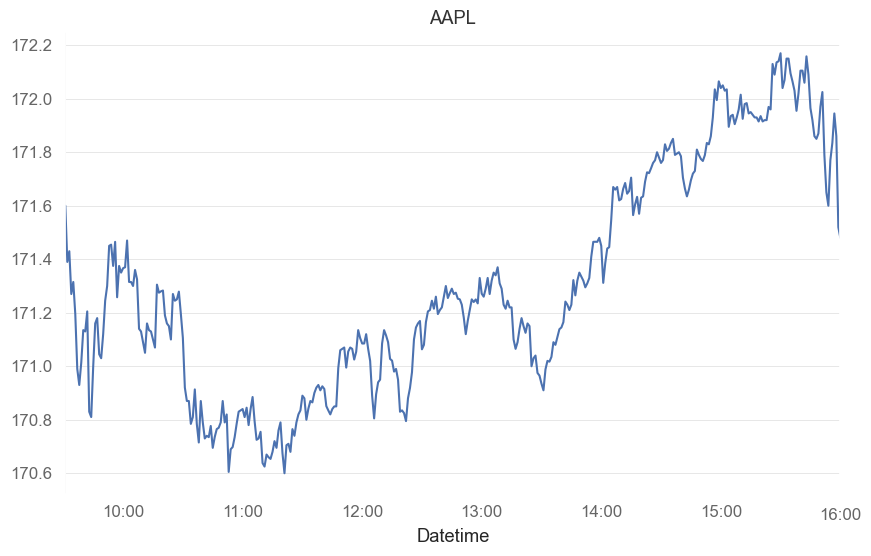

In [5]:
# Set Ticker, Data Period and Time Interval
ticker = "AAPL"
period = "1d"    # The period can be "1d", "5d", "1mo", "3mo", "6mo", "1y", "2y", "5y", "10y", or "ytd
interval = "1m"  # The interval can be "1m", "2m", "5m", "10m", "30m", "1h", "1d", "1wk", "1mo" etc.
price_column = "Close"
export_path = "C:/Temp/TSCO.L.csv"

# Download and Format Financial Data
fd = FinancialData(ticker, period, interval, price_column)

# Show Data
fd.show_data()

# Plot Data
fd.plot_data()

# Export Data to CSV
#fd.export_data()

<AxesSubplot: ylabel='Frequency'>

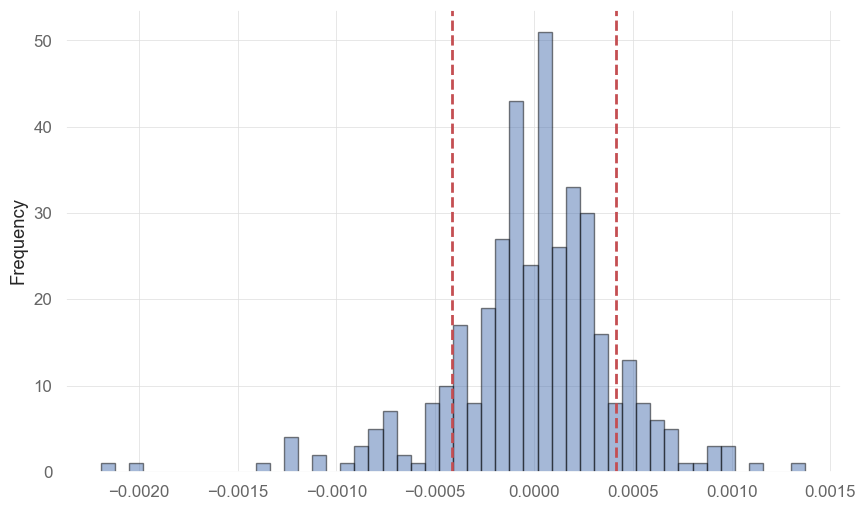

In [31]:
std = fd.data["Returns"].std()
fd.data["Returns"].plot.hist(bins=50, alpha=0.5, color='b', edgecolor='black', linewidth=1.0)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2) # positive standard deviation, axvline is a vertical line at x = std
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
plt.show()

In [28]:
std = fd.data["Returns"].std()
summary = fd.data["Returns"].describe()
print(summary)

count    390.000000
mean      -0.000004
std        0.000414
min       -0.002193
25%       -0.000175
50%        0.000029
75%        0.000226
max        0.001373
Name: Returns, dtype: float64


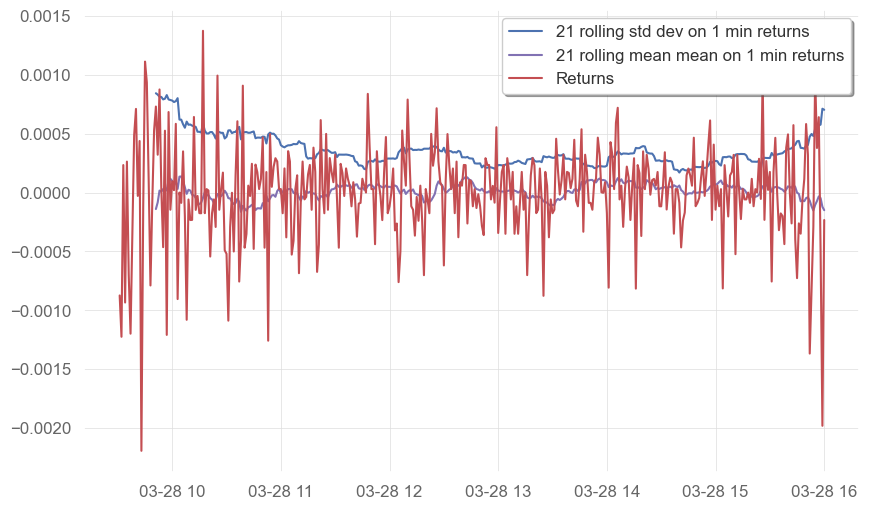

In [37]:
rolling = fd.data["Returns"].rolling(window=21)


plt.plot(rolling.std(), color='b', label='21 rolling std dev on 1 min returns')
plt.plot(rolling.mean(), color='m', label='21 rolling mean mean on 1 min returns')
plt.plot(fd.data["Returns"], color='r', label='Returns')
legend = plt.legend(loc='upper right', shadow=True)
